In [2]:
import rebound
import matplotlib.pyplot as plt
import numpy as np
from subprocess import call
%matplotlib inline

In [3]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1e-4, P=1, l=-np.pi/2)
sim.add(m=0, P=1.50, e=0.12, pomega=np.pi/2, l=np.pi/2)
sim.move_to_com()
ps = sim.particles
sim.integrate(1.5)
sim.t = 0
sim.save('separatrix.bin')

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm


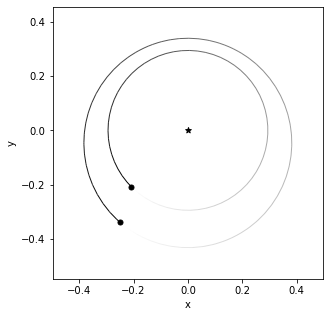

In [4]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1e-4, P=1, l=np.pi/4)
sim.add(m=0, P=1.50, e=0.12, pomega=np.pi/2, l=5*np.pi/4)
sim.move_to_com()
ps = sim.particles
sim.integrate(1.5)
sim.t = 0
sim.save('pendulum.bin')
rebound.OrbitPlot(sim)

In [5]:
def write_png(params):
    i, time, filename = params
    sim = rebound.Simulation(filename)
    sim.integrate(time, exact_finish_time=0)
    ps = sim.particles
    fig, ax = plt.subplots(figsize=(8,8))#rebound.OrbitPlot(sim, lw=2)
    Nout = 1000
    fs = np.linspace(0, 2*np.pi, Nout)
    for p in ps[1:]:
        rs = np.zeros(Nout)
        for j, f in enumerate(fs):
            rs[j] = p.a*(1-p.e**2)/(1+p.e*np.cos(f))
        ax.plot(rs*np.cos(fs+np.pi/2), rs*np.sin(fs+np.pi/2), 'k', lw=3)

    phi = np.mod(3*ps[2].l - 2*ps[1].l - ps[2].pomega, 2*np.pi)
    r = ps[2].a*(1-ps[2].e**2)/(1+ps[2].e*np.cos(phi))
    ax.plot([0, r*np.cos(np.pi/2+phi)], [0, r*np.sin(np.pi/2+phi)], 'k', lw=3)
    ax.scatter(r*np.cos(np.pi/2+phi), r*np.sin(np.pi/2+phi), s=100, facecolor='k', edgecolor='k', zorder=3)
    ax.scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim([-0.42, 0.42])
    ax.set_ylim([-0.46, 0.46])
    ax.text(-0.22, 0.4, 'Time = {0} years'.format(int(sim.t)), fontsize=32)
    fig.savefig('tmp/{0:0=5d}.png'.format(i), transparent=True, dpi=300.4, bbox_inches='tight')
    plt.close(fig)  

In [14]:
%%time
filename = 'separatrix.bin'
Lmovie = 15 # sec
fps = 30
Norbits = 600
times = np.linspace(0, Norbits, int(Lmovie*fps))

call("rm -f tmp/*", shell=True)
pool = rebound.InterruptiblePool()
params = [(i, time, filename) for i, time in enumerate(times)]
res = pool.map(write_png, params)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: G

CPU times: user 95.5 ms, sys: 82.8 ms, total: 178 ms
Wall time: 33.8 s


In [14]:
%%time
filename = 'separatrix.bin'
Lmovie = 15 # sec
fps = 30
Norbits = 600
times = np.linspace(0, Norbits, int(Lmovie*fps))

call("rm -f tmp/*", shell=True)
pool = rebound.InterruptiblePool()
params = [(i, time, filename) for i, time in enumerate(times)]
res = pool.map(write_png, params)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: G

CPU times: user 95.5 ms, sys: 82.8 ms, total: 178 ms
Wall time: 33.8 s


In [7]:
%%time
filename = 'pendulum.bin'
Lmovie = 45 # sec
fps = 30
Norbits = 600
times = np.linspace(0, Norbits, int(Lmovie*fps))

call("rm -f tmp/*", shell=True)
pool = rebound.InterruptiblePool()
params = [(i, time, filename) for i, time in enumerate(times)]
res = pool.map(write_png, params)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families w

CPU times: user 208 ms, sys: 117 ms, total: 325 ms
Wall time: 2min 5s


Text(-0.22, 0.4, 'Time = 3 years')

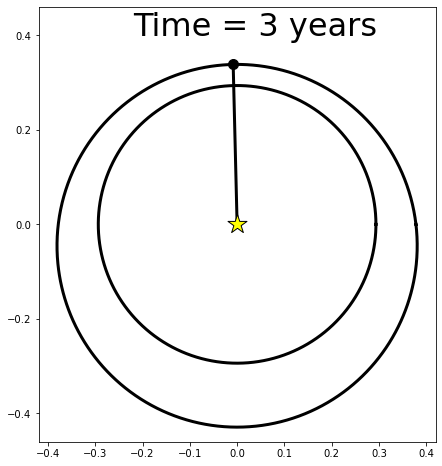

In [11]:
i, time = 1, 50
sim = rebound.Simulation('pendulum.bin')
sim.integrate(time, exact_finish_time=0)
ps = sim.particles
fig, ax = plt.subplots(figsize=(8,8))#rebound.OrbitPlot(sim, lw=2)
Nout = 1000
fs = np.linspace(0, 2*np.pi, Nout)
for p in ps[1:]:
    rs = np.zeros(Nout)
    for j, f in enumerate(fs):
        rs[j] = p.a*(1-p.e**2)/(1+p.e*np.cos(f-np.pi/2))
    ax.plot(rs*np.cos(fs), rs*np.sin(fs), 'k', lw=3)

phi = np.mod(3*ps[2].l - 2*ps[1].l - ps[2].pomega, 2*np.pi)
r = ps[2].a*(1-ps[2].e**2)/(1+ps[2].e*np.cos(phi))
ax.plot([0, r*np.cos(np.pi/2+phi)], [0, r*np.sin(np.pi/2+phi)], 'k', lw=3)
ax.scatter(r*np.cos(np.pi/2+phi), r*np.sin(np.pi/2+phi), s=100, facecolor='k', edgecolor='k', zorder=3)
ax.scatter(0, 0, s=400, marker='*', facecolor='yellow', edgecolor='k', zorder=3)
ax.set_aspect('equal')
#ax.axis('off')
ax.set_xlim([-0.42, 0.42])
ax.set_ylim([-0.46, 0.46])
ax.text(-0.22, 0.4, 'Time = {0} years'.format(3), fontsize=32)


In [9]:
Lmovie = 15 # sec
fps = 30
Norbits = 1000
times = np.linspace(0, Norbits, int(Lmovie*fps))
ps = sim.particles
Nout = 1000
phi = np.zeros(Nout)
e = np.zeros(Nout)
times = np.linspace(0, Norbits, Nout)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    phi[i] = np.mod(3*ps[2].l - 2*ps[1].l - ps[2].pomega, 2*np.pi)
    e[i] = ps[2].e

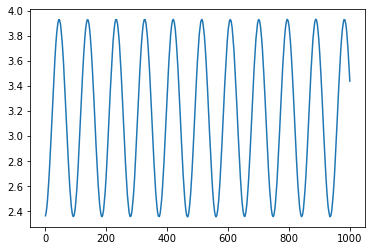

In [10]:
fig, ax =plt.subplots()
ax.plot(times, phi)

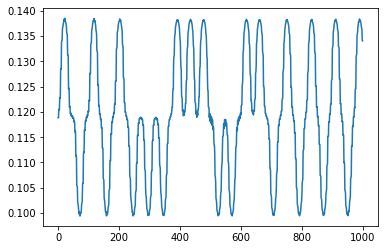

In [196]:
fig, ax =plt.subplots()
ax.plot(times, e)